In [1]:
import sys

sys.path.append("../")

In [2]:
import time
from datetime import datetime

import numpy as np
import pydoocs

from src import bc_optimize, dl_optimize, ea_optimize, sh_optimize
from src.environments import bc, dl, ea, sh

/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/ocelot/cpbd/beam.py:1567: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  slice_analysis = slice_analysis_py if not nb_flag else nb.jit(slice_analysis_py)
/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/ocelot/cpbd/tm_utils.py:153: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using

In [3]:
EXPERIMENT = "first_test_on_machine"
BACKEND = "doocs"  # TODO: Remember to change to "doocs" for real experiments
LOG_DATA = True  # TODO: Remember to set to True
LOG_TO_LOGBOOK = True  # TODO: Remember to set to True
RL_MAX_STEPS = 50

In [4]:
def reset_bc():
    """Set all magnets to zero."""
    env = bc.TransverseTuning(backend=BACKEND, magnet_init_mode=np.zeros(5))
    _, _ = env.reset()


def reset_dl():
    """Set all magnets to zero."""
    env = dl.TransverseTuning(backend=BACKEND, magnet_init_mode=np.zeros(4))
    _, _ = env.reset()


def reset_ea():
    """Set all magnets to zero."""
    env = ea.TransverseTuning(backend=BACKEND, magnet_init_mode=np.zeros(5))
    _, _ = env.reset()


def reset_sh():
    """Set all magnets to zero."""
    env = sh.TransverseTuning(backend=BACKEND, magnet_init_mode=np.zeros(4))
    _, _ = env.reset()

In [5]:
def move_screen_in(name: str) -> None:
    current_steps = pydoocs.read(f"SINBAD.DIAG/SCREEN.ML/{name}/POS")["data"]
    target_steps = pydoocs.read(f"SINBAD.DIAG/SCREEN.ML/{name}/SCREEN1.STEPS")["data"]
    pydoocs.write(f"SINBAD.DIAG/SCREEN.ML/{name}/SCREEN1", 1)

    # Wait
    while not current_steps == target_steps:
        current_steps = pydoocs.read(f"SINBAD.DIAG/SCREEN.ML/{name}/POS")["data"]

    pydoocs.write(f"SINBAD.DIAG/CAMERA/{name}/START", 1)
    time.sleep(1.0)

    print(f"{name} moved in")

def move_screen_out(name: str) -> None:
    current_steps = pydoocs.read(f"SINBAD.DIAG/SCREEN.ML/{name}/POS")["data"]
    target_steps = 0
    pydoocs.write(f"SINBAD.DIAG/SCREEN.ML/{name}/OUT", 1)

    # Wait
    while not current_steps == target_steps:
        current_steps = pydoocs.read(f"SINBAD.DIAG/SCREEN.ML/{name}/POS")["data"]

    pydoocs.write(f"SINBAD.DIAG/CAMERA/{name}/START", 0)
    time.sleep(1.0)

    print(f"{name} moved out")

### Section EA

<span style="color:red">Remember to put in AREABSCR1.</span>.


In [6]:
# move_screen_in("AR.EA.BSC.R.1")

In [7]:
# reset_ea()

In [8]:
# ea_optimize.optimize(
#     target_mu_x=-1.051e-3,
#     target_sigma_x=0.256e-3,
#     target_mu_y=-0.695e-3,
#     target_sigma_y=0.298e-3,
#     target_mu_x_threshold=4e-5,
#     target_mu_y_threshold=4e-5,
#     target_sigma_x_threshold=4e-5,
#     target_sigma_y_threshold=4e-5,
#     max_steps=RL_MAX_STEPS,
#     model_name="vital-breeze-514",
#     logbook=LOG_TO_LOGBOOK,
#     data_log_dir=(
#         f"../data/threading/{EXPERIMENT}/01_ea_{datetime.now():%Y%m%d%H%M}"
#         if LOG_DATA
#         else None
#     ),
#     progress_bar=True,
#     callback=None,
#     backend=BACKEND,
# )

### Section BC

<span style="color:red">Remember to put in ARBCBSCE1.</span>.


In [9]:
# move_screen_out("AR.EA.BSC.R.1")
move_screen_in("AR.BC.BSC.E.1")

AR.BC.BSC.E.1 moved in


In [10]:
# reset_bc()

/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(
  0%|          | 0/50 [00:00<?, ?it/s]

WARNING 2023-12-21 17:26:57.186741: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM4/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM4/PS_ON / 2023-12-21 17:26:57.188270)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM4/STRENGTH.SP / 2023-12-21 17:27:03.907687)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM4/PS_ON / 2023-12-21 17:27:13.920593)
    -> Wiggling to value 35.42150126154011 (SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM4/STRENGTH.SP / 2023-12-21 17:27:20.939750)
    -> Returning from wiggle to 0.42150126154010703 (SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM4/STRENGTH.SP / 2023-12-21 17:27:21.448757)


 10%|█         | 5/50 [02:54<15:20, 20.45s/it]   

WARNING 2023-12-21 17:29:51.887076: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM6/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM6/PS_ON / 2023-12-21 17:29:51.887830)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM6/STRENGTH.SP / 2023-12-21 17:29:58.911669)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM6/PS_ON / 2023-12-21 17:30:08.923802)
    -> Wiggling to value -35.16240276239281 (SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM6/STRENGTH.SP / 2023-12-21 17:30:15.943780)
    -> Returning from wiggle to -0.16240276239281165 (SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM6/STRENGTH.SP / 2023-12-21 17:30:16.451692)
WARNING 2023-12-21 17:32:26.501836: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM6/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM6/PS_ON / 2023-12-21 17:32:26.502033)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM6/STRENGTH.SP / 2023-12-21 17:32:32.619715)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM6/PS_ON /

 24%|██▍       | 12/50 [10:44<15:26, 24.38s/it]  

WARNING 2023-12-21 17:37:41.326732: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM5/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM5/PS_ON / 2023-12-21 17:37:41.327952)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM5/STRENGTH.SP / 2023-12-21 17:37:48.347749)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM5/PS_ON / 2023-12-21 17:37:58.359664)
    -> Wiggling to value 35.17183565524485 (SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM5/STRENGTH.SP / 2023-12-21 17:38:05.680105)
    -> Returning from wiggle to 0.1718356552448467 (SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM5/STRENGTH.SP / 2023-12-21 17:38:06.183405)
WARNING 2023-12-21 17:40:16.210862: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM5/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM5/PS_ON / 2023-12-21 17:40:16.211102)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM5/STRENGTH.SP / 2023-12-21 17:40:23.237268)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/ARMRMQZM5/PS_ON / 20

100%|██████████| 50/50 [23:55<00:00, 28.71s/it]   

title = 'Beam Optimisation on ARBCBSCE1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on ARBCBSCE1\n\nAgent: whole-elevator-1\nStart time: 2023-12-21 17:25:57.129637\nTime taken: 0:23:47.318032\nNo. of steps: 51\n\nBeam before:\n    mu_x    = -0.0030 mm\n    sigma_x =  6.2701 mm\n    mu_y    =  0.0021 mm\n    sigma_y =  3.6614 mm\n\nBeam after:\n    mu_x    =  0.0510 mm\n    sigma_x =  0.1197 mm\n    mu_y    =  0.0294 mm\n    sigma_y =  0.4708 mm\n\nTarget beam:\n    mu_x    =  0.0000 mm    (e = 0.0400 mm) :/\n    sigma_x =  0.3500 mm    (e = 0.0400 mm) :/\n    mu_y    =  0.0000 mm    (e = 0.0400 mm) ;)\n    sigma_y =  0.3500 mm    (e = 0.0400 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0510 mm\n    |delta_sigma_x| =  0.2303 mm\n    |delta_mu_y|    =  0.0294 mm\n    |delta_sigma_y| =  0.1208 mm\n\n    MAE =  0.1079 mm\n\nFinal magnet settings:\n    ARMRMQZM4 strength =  -0.0828 1/m^2\n    ARMRMQZM5 strength =   2.5748 1/m^2\n    ARMRMCVM5 kick =  -0.2

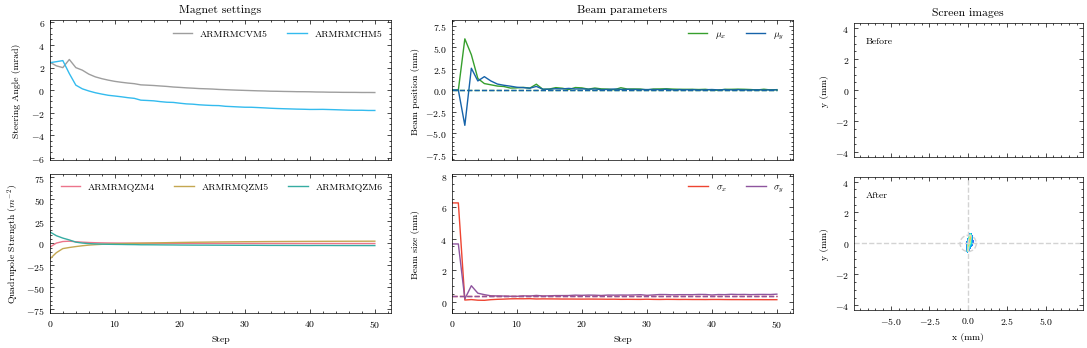

In [11]:
bc_optimize.optimize(
    target_mu_x=0.0,
    target_sigma_x=0.35e-3,
    target_mu_y=0.0,
    target_sigma_y=0.35e-3,
    target_mu_x_threshold=4e-5,
    target_mu_y_threshold=4e-5,
    target_sigma_x_threshold=4e-5,
    target_sigma_y_threshold=4e-5,
    max_steps=RL_MAX_STEPS,
    model_name="whole-elevator-1",
    logbook=LOG_TO_LOGBOOK,
    data_log_dir=(
        f"../data/threading/{EXPERIMENT}/02_bc_{datetime.now():%Y%m%d%H%M}"
        if LOG_DATA
        else None
    ),
    progress_bar=True,
    callback=None,
    backend=BACKEND,
)

In [19]:
# move_screen_out("AR.BC.BSC.E.1")
move_screen_in("AR.DL.BSC.R.1")

AR.DL.BSC.R.1 moved in


### Section DL

<span style="color:red">Remember to put in ARDLBSCR1.</span>.


In [20]:
# reset_dl()

WARNING 2023-12-21 18:38:20.547914: Trying to reanimate SINBAD.MAGNETS/MAGNET.ML/ARDLMQZM1/STRENGTH.
    -> Truning off (SINBAD.MAGNETS/MAGNET.ML/ARDLMQZM1/PS_ON / 2023-12-21 18:38:20.548204)
    -> Setpoint to 0.0 (SINBAD.MAGNETS/MAGNET.ML/ARDLMQZM1/STRENGTH.SP / 2023-12-21 18:38:27.267718)
    -> Turning back on (SINBAD.MAGNETS/MAGNET.ML/ARDLMQZM1/PS_ON / 2023-12-21 18:38:37.279741)
    -> Wiggling to value 35.3847416922484 (SINBAD.MAGNETS/MAGNET.ML/ARDLMQZM1/STRENGTH.SP / 2023-12-21 18:38:44.299736)
    -> Returning from wiggle to 0.38474169224840055 (SINBAD.MAGNETS/MAGNET.ML/ARDLMQZM1/STRENGTH.SP / 2023-12-21 18:38:44.811380)


100%|██████████| 50/50 [10:42<00:00, 12.85s/it]

title = 'Beam Optimisation on ARDLBSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on ARDLBSCR1\n\nAgent: happy-bird-5\nStart time: 2023-12-21 18:36:15.880708\nTime taken: 0:10:35.535097\nNo. of steps: 51\n\nBeam before:\n    mu_x    = -2.7365 mm\n    sigma_x =  0.2399 mm\n    mu_y    = -2.5408 mm\n    sigma_y =  0.0549 mm\n\nBeam after:\n    mu_x    = -0.0459 mm\n    sigma_x =  0.0450 mm\n    mu_y    = -0.0000 mm\n    sigma_y =  0.2090 mm\n\nTarget beam:\n    mu_x    =  0.0000 mm    (e = 0.0400 mm) :/\n    sigma_x =  0.3500 mm    (e = 0.0400 mm) :/\n    mu_y    =  0.0000 mm    (e = 0.0400 mm) ;)\n    sigma_y =  0.3500 mm    (e = 0.0400 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0459 mm\n    |delta_sigma_x| =  0.3050 mm\n    |delta_mu_y|    =  0.0000 mm\n    |delta_sigma_y| =  0.1410 mm\n\n    MAE =  0.1230 mm\n\nFinal magnet settings:\n    ARDLMCVM1 kick =  -2.0281 mrad\n    ARDLMCHM1 kick =  -0.9468 mrad\n    ARDLMQZM1 strength =   9.1164 1/m^2\

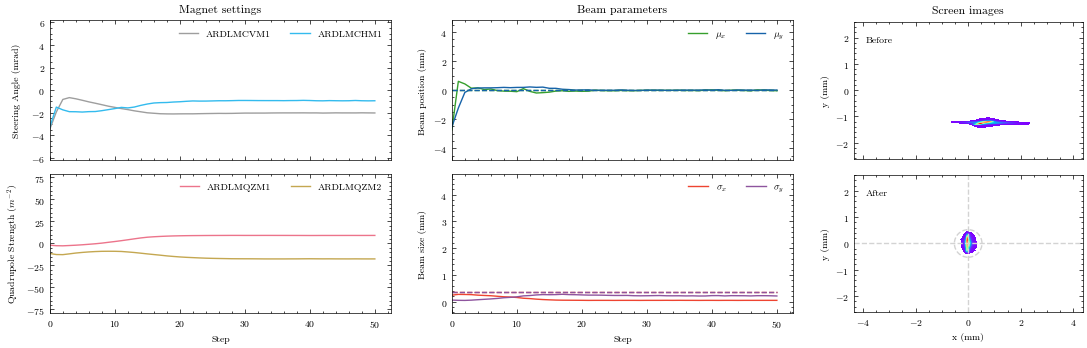

In [25]:
dl_optimize.optimize(
    target_mu_x=0.0,
    target_sigma_x=0.35e-3,
    target_mu_y=0.0,
    target_sigma_y=0.35e-3,
    target_mu_x_threshold=4e-5,
    target_mu_y_threshold=4e-5,
    target_sigma_x_threshold=4e-5,
    target_sigma_y_threshold=4e-5,
    max_steps=RL_MAX_STEPS,
    model_name="happy-bird-5",
    logbook=LOG_TO_LOGBOOK,
    data_log_dir=(
        f"../data/threading/{EXPERIMENT}/03_dl_{datetime.now():%Y%m%d%H%M}"
        if LOG_DATA
        else None
    ),
    progress_bar=True,
    callback=None,
    backend=BACKEND,
)

### Section SH

<span style="color:red">Remember to put in ARSHBSCE2.</span>.


In [26]:
move_screen_out("AR.DL.BSC.R.1")
move_screen_in("AR.SH.BSC.E.2")

AR.DL.BSC.R.1 moved out
AR.SH.BSC.E.2 moved in


In [27]:
# reset_sh()

/home/kaiserja/.conda/envs/ares-transverse-tuning/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.pbar to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.pbar` for environment variables or `env.get_wrapper_attr('pbar')` that will search the reminding wrappers.
  logger.warn(
100%|██████████| 50/50 [08:10<00:00,  9.82s/it]

title = 'Beam Optimisation on ARSHBSCE2 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on ARSHBSCE2\n\nAgent: warm-field-2\nStart time: 2023-12-21 18:48:21.010576\nTime taken: 0:08:00.817813\nNo. of steps: 51\n\nBeam before:\n    mu_x    = -0.0049 mm\n    sigma_x =  10.3090 mm\n    mu_y    =  0.0035 mm\n    sigma_y =  6.1707 mm\n\nBeam after:\n    mu_x    = -0.0049 mm\n    sigma_x =  10.3090 mm\n    mu_y    =  0.0035 mm\n    sigma_y =  6.1707 mm\n\nTarget beam:\n    mu_x    =  0.0000 mm    (e = 0.0400 mm) ;)\n    sigma_x =  0.3500 mm    (e = 0.0400 mm) :/\n    mu_y    =  0.0000 mm    (e = 0.0400 mm) ;)\n    sigma_y =  0.3500 mm    (e = 0.0400 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0049 mm\n    |delta_sigma_x| =  9.9590 mm\n    |delta_mu_y|    =  0.0035 mm\n    |delta_sigma_y| =  5.8207 mm\n\n    MAE =  3.9471 mm\n\nFinal magnet settings:\n    ARDLMCVM2 kick =   6.2224 mrad\n    ARDLMQZM3 strength =   3.6706 1/m^2\n    ARDLMCHM2 kick =   6.2224 mra

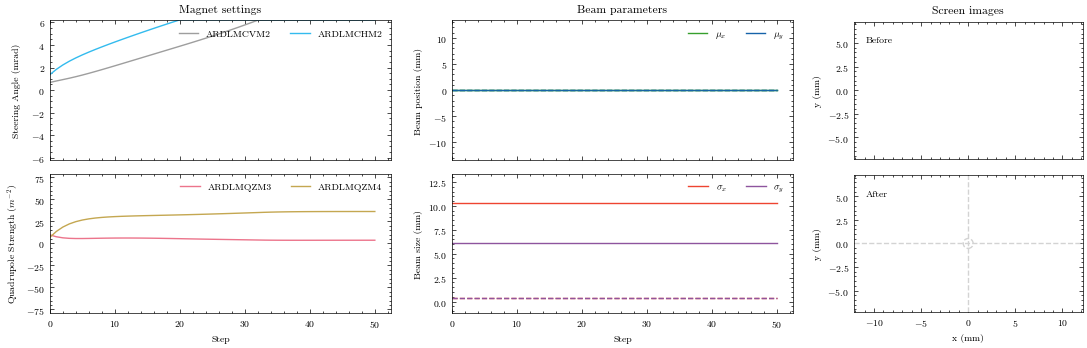

In [28]:
sh_optimize.optimize(
    target_mu_x=0.0,
    target_sigma_x=0.35e-3,
    target_mu_y=0.0,
    target_sigma_y=0.35e-3,
    target_mu_x_threshold=4e-5,
    target_mu_y_threshold=4e-5,
    target_sigma_x_threshold=4e-5,
    target_sigma_y_threshold=4e-5,
    max_steps=RL_MAX_STEPS,
    model_name="warm-field-2",
    logbook=LOG_TO_LOGBOOK,
    data_log_dir=(
        f"../data/threading/{EXPERIMENT}/04_sh_{datetime.now():%Y%m%d%H%M}"
        if LOG_DATA
        else None
    ),
    progress_bar=True,
    callback=None,
    backend=BACKEND,
)

In [29]:
move_screen_out("AR.SH.BSC.E.2")

AR.SH.BSC.E.2 moved out
